# First Scenario: Encrypted-Traffic-Classification-with-Deep-Learning

# SVM

In [39]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_recall_fscore_support, precision_score, recall_score, f1_score

#Load the Dataset
datapath = 'https://raw.githubusercontent.com/micaelCZ/Encrypted-Traffic-Classification-with-Deep-Learning/main/dataset/pre_processedDataset/Scenario1.csv'
dataframe = pd.read_csv(datapath,low_memory=False, sep=',')
dataframe.head()

,Source IP,Source Port,Destination IP,Destination Port,Protocol,Flow Duration,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,...,Bwd IAT Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,label
0,10.0.2.15,53913,216.58.208.46,80,6,435,0.0,4597.701149,435.0,0.0,...,0,0,0,0,0,0,0,0,0,nonTOR
1,10.0.2.15,53913,216.58.208.46,80,6,259,0.0,7722.007722,259.0,0.0,...,0,0,0,0,0,0,0,0,0,nonTOR
2,10.0.2.15,53913,216.58.208.46,80,6,891,0.0,2244.668911,891.0,0.0,...,0,0,0,0,0,0,0,0,0,nonTOR
3,10.0.2.15,53913,216.58.208.46,80,6,1074,0.0,1862.197393,1074.0,0.0,...,0,0,0,0,0,0,0,0,0,nonTOR
4,10.0.2.15,53913,216.58.208.46,80,6,315,0.0,6349.206349,315.0,0.0,...,0,0,0,0,0,0,0,0,0,nonTOR


In [40]:
def dfNormalize(df):
    for feature_name in df.columns:
        df.loc[:,feature_name]= pd.to_numeric(df.loc[:,feature_name], errors='coerce').fillna(0)
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()   
        if (max_value - min_value) > 0:
            df.loc[:,feature_name] = (df.loc[:,feature_name] - min_value) / (max_value - min_value)
        else:
            df.loc[:,feature_name] = (df.loc[:,feature_name]- min_value)    
    return df
dataframe = dataframe.reindex(np.random.permutation(dataframe.index)).copy()
keys = dataframe.keys()
data_to_process = dataframe[keys[4:len(keys) - 1]].copy()
x_normalised = dfNormalize(data_to_process)
print(x_normalised.describe())

           Protocol   Flow Duration   Flow Bytes/s   Flow Packets/s  \
count  67834.000000    67834.000000        67830.0          67828.0   
mean       0.560663        0.299188            0.0              0.0   
std        0.496310        0.406300            0.0              0.0   
min        0.000000        0.000000            0.0              0.0   
25%        0.000000        0.004436            0.0              0.0   
50%        1.000000        0.041086            0.0              0.0   
75%        1.000000        0.732555            0.0              0.0   
max        1.000000        1.000000            0.0              0.0   

        Flow IAT Mean   Flow IAT Std   Flow IAT Max   Flow IAT Min  \
count    67834.000000   67834.000000   67834.000000   67834.000000   
mean         0.031600       0.031363       0.089855       0.019491   
std          0.069971       0.090973       0.173880       0.057865   
min          0.000000       0.000000       0.000000       0.000000   
25%       

In [41]:
change_labels = lambda x: 1 if x == 'nonTOR' else 0
y_normalised = dataframe['label'].apply(change_labels)
X_train, X_test, y_train, y_test = train_test_split(x_normalised,
                                            y_normalised, test_size=0.3, random_state=42)
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)
#Scale the data using StandardScaler.

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

y_scores = y_scores[:len(y_test)]

# **KERNEL=SIGMOID**

Accuracy: 88.18103335784926
Precision: 88.18103335784926
Recall: 88.18103335784926
F1-score: 88.18103335784926


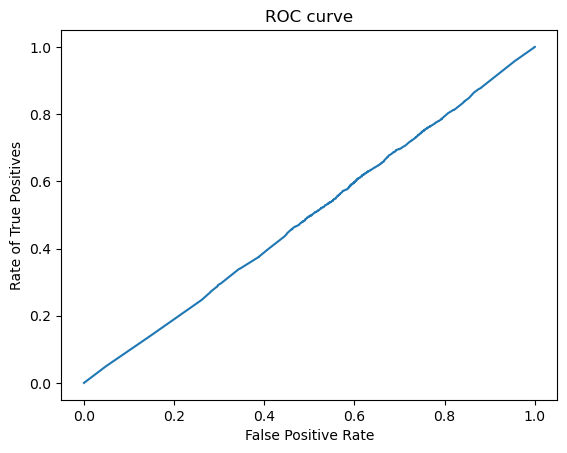

In [42]:
#Create SVM model with sigmoid kernel
svm_sigmoid = SVC(kernel='sigmoid', gamma='auto', coef0=6, C=1.0, random_state=42)

#Define evaluation metrics
scoring_sigmoid = {'accuracy': make_scorer(accuracy_score),
                   'precision': make_scorer(precision_score, average='micro'),
                   'recall': make_scorer(recall_score, average='micro'),
                   'f1_score': make_scorer(f1_score, average='micro')}

#Perform cross validation with 5 folds
cv_results_sigmoid = cross_validate(svm_sigmoid, X_train_scaled, y_train, cv=5, scoring=scoring_sigmoid)

#Print the results of the cross validation
print('Accuracy:', cv_results_sigmoid['test_accuracy'].mean()*100)
print('Precision:', cv_results_sigmoid['test_precision'].mean()*100)
print('Recall:', cv_results_sigmoid['test_recall'].mean()*100)
print('F1-score:', cv_results_sigmoid['test_f1_score'].mean()*100)


# Calculate the true positive rate and the false positive rate at different thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('Rate of True Positives')
plt.title('ROC curve')
plt.show()

# **KERNEL=LINEAR**

In [43]:
#Crear el modelo SVM con kernel lineal
svm_linear = SVC(kernel='linear', C=0.00001, random_state=42)

#Define evaluation metrics
scoring_linear = {'accuracy': make_scorer(accuracy_score),
                  'precision': make_scorer(precision_score, average='micro'),
                  'recall': make_scorer(recall_score, average='micro'),
                  'f1_score': make_scorer(f1_score, average='micro')}

#Perform cross validation with 5 folds
cv_results_linear = cross_validate(svm_linear, X_train_scaled, y_train, cv=5, scoring=scoring_linear)

#Print the results of the cross validation
print('Accuracy:', cv_results_linear['test_accuracy'].mean()*100)
print('Precision:', cv_results_linear['test_precision'].mean()*100)
print('Recall:', cv_results_linear['test_recall'].mean()*100)
print('F1-score:', cv_results_linear['test_f1_score'].mean()*100)

Accuracy: 88.18103335784926
Precision: 88.18103335784926
Recall: 88.18103335784926
F1-score: 88.18103335784926


# **KERNEL= RBF**

In [44]:
#Crear el modelo SVM con kernel rbf
svm_rbf = SVC(kernel='rbf', gamma=0.1, C=0.0001, random_state=42)

#Define evaluation metrics
scoring_rbf = {'accuracy': make_scorer(accuracy_score),
               'precision': make_scorer(precision_score, average='micro'),
               'recall': make_scorer(recall_score, average='micro'),
               'f1_score': make_scorer(f1_score, average='micro')}

#Perform cross validation with 5 folds
cv_results_rbf = cross_validate(svm_rbf, X_train_scaled, y_train, cv=5, scoring=scoring_rbf)

#Print the results of the cross validation
print('Accuracy:', cv_results_rbf['test_accuracy'].mean()*100)
print('Precision:', cv_results_rbf['test_precision'].mean()*100)
print('Recall:', cv_results_rbf['test_recall'].mean()*100)
print('F1-score:', cv_results_rbf['test_f1_score'].mean()*100)

Accuracy: 88.18103335784926
Precision: 88.18103335784926
Recall: 88.18103335784926
F1-score: 88.18103335784926


# **KERNEL= POLINOMYAL**

In [45]:
#Crear el modelo SVM con kernel polinómico
svm_poly = SVC(kernel='poly', degree=1, coef0=1, C=0.0001, random_state=42)

#Define evaluation metrics
scoring_poly = {'accuracy': make_scorer(accuracy_score),
                'precision': make_scorer(precision_score, average='micro'),
                'recall': make_scorer(recall_score, average='micro'),
                'f1_score': make_scorer(f1_score, average='micro')}

#Perform cross validation with 5 folds
cv_results_poly = cross_validate(svm_poly, X_train_scaled, y_train, cv=5, scoring=scoring_poly)

#Print the results of the cross validation
print('Accuracy:', cv_results_poly['test_accuracy'].mean()*100)
print('Precision:', cv_results_poly['test_precision'].mean()*100)
print('Recall:', cv_results_poly['test_recall'].mean()*100)
print('F1-score:', cv_results_poly['test_f1_score'].mean()*100)

Accuracy: 88.18103335784926
Precision: 88.18103335784926
Recall: 88.18103335784926
F1-score: 88.18103335784926


# RANDOM FOREST

In [46]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, recall_score, precision_score

from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score, make_scorer
from scipy.stats import randint
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, recall_score, precision_score

# load the Dataset
datapath = 'https://raw.githubusercontent.com/micaelCZ/Encrypted-Traffic-Classification-with-Deep-Learning/main/dataset/pre_processedDataset/Scenario1.csv'
dataframe = pd.read_csv(datapath, low_memory=False, sep=',')

dataframe.head()

,Source IP,Source Port,Destination IP,Destination Port,Protocol,Flow Duration,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,...,Bwd IAT Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,label
0,10.0.2.15,53913,216.58.208.46,80,6,435,0.0,4597.701149,435.0,0.0,...,0,0,0,0,0,0,0,0,0,nonTOR
1,10.0.2.15,53913,216.58.208.46,80,6,259,0.0,7722.007722,259.0,0.0,...,0,0,0,0,0,0,0,0,0,nonTOR
2,10.0.2.15,53913,216.58.208.46,80,6,891,0.0,2244.668911,891.0,0.0,...,0,0,0,0,0,0,0,0,0,nonTOR
3,10.0.2.15,53913,216.58.208.46,80,6,1074,0.0,1862.197393,1074.0,0.0,...,0,0,0,0,0,0,0,0,0,nonTOR
4,10.0.2.15,53913,216.58.208.46,80,6,315,0.0,6349.206349,315.0,0.0,...,0,0,0,0,0,0,0,0,0,nonTOR


In [47]:
# Reduce the number of examples of the minority class
nonTOR_df = dataframe[dataframe['label'] == 'nonTOR']
TOR_df = dataframe[dataframe['label'] == 'TOR'].sample(n=len(nonTOR_df) // 2, replace=True, random_state=42)
dataframe = pd.concat([nonTOR_df, TOR_df], axis=0).reset_index(drop=True)

In [48]:
# Normalize the data

def dfNormalize(df):
    for feature_name in df.columns:
        df.loc[:, feature_name] = pd.to_numeric(df.loc[:, feature_name], errors='coerce').fillna(0)
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        if (max_value - min_value) > 0:
            df.loc[:, feature_name] = (df.loc[:, feature_name] - min_value) / (max_value - min_value)
        else:
            df.loc[:, feature_name] = (df.loc[:, feature_name] - min_value)
    return df

dataframe = dataframe.reindex(np.random.permutation(dataframe.index)).copy()
keys = dataframe.keys()
data_to_process = dataframe[keys[4:len(keys) - 1]].copy()
x_normalised = dfNormalize(data_to_process)

In [49]:
change_labels = lambda x: 1 if x == 'nonTOR' else 0
y_normalised = dataframe['label'].apply(change_labels)
X_train, X_test, y_train, y_test = train_test_split(x_normalised, y_normalised, test_size=0.3, random_state=42)

In [50]:
# IMPUTE
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


In [51]:
# RANDOM FOREST
param_dist = {
    'n_estimators': randint(10, 50),  # reduce the number of estimators
    'max_depth': [2, 5],  # reduce the maximum depth of the trees
    'min_samples_split': [2, 3, 4],  # increase the minimum number of samples required to split a node
    'min_samples_leaf': [1, 2],  # increase the minimum number of samples required to form a leaf
    'max_features': ['sqrt', 'log2']  # reduce the maximum number of features used in each tree
}

random_search = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_distributions=param_dist, n_iter=50,
                                   cv=5, scoring=make_scorer(f1_score), random_state=42)
random_search.fit(X_train_imputed, y_train)
print(f'Best parameters: {random_search.best_params_}')

Best parameters: {'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 38}


In [52]:
y_pred = random_search.predict(X_test_imputed)
accuracy = accuracy_score(y_test, y_pred)
print(f'Test accuracy: {accuracy:.4f}')

Test accuracy: 0.9182


In [53]:
# Train a Random Forest classifier
rfc = RandomForestClassifier(n_estimators=random_search.best_params_['n_estimators'], 
                              max_depth=random_search.best_params_['max_depth'],
                              min_samples_split=random_search.best_params_['min_samples_split'],
                              min_samples_leaf=random_search.best_params_['min_samples_leaf'],
                              max_features=random_search.best_params_['max_features'],
                              random_state=42)
rfc.fit(X_train_imputed, y_train)

RandomForestClassifier(max_depth=5, max_features='log2', min_samples_leaf=2,
                       min_samples_split=3, n_estimators=38, random_state=42)

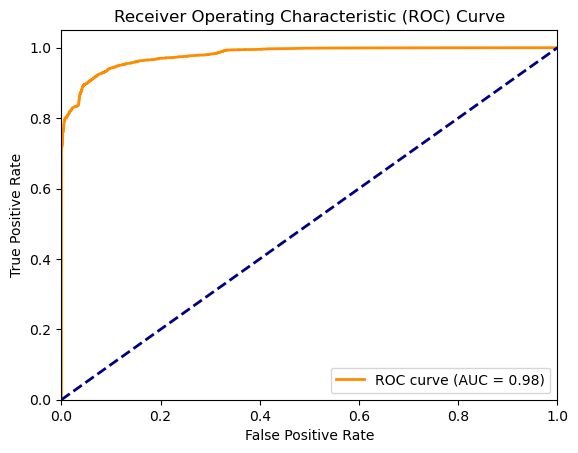

In [54]:
# Predict on test data
y_scores = rfc.predict_proba(X_test_imputed)[:, 1]  # Probabilities of positive class

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [55]:
# Predict on test data and evaluate accuracy, F1, Recall, and Precision
y_pred = rfc.predict(X_test_imputed)
accuracy = (y_pred == y_test).mean()
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

In [56]:
print(f'Test accuracy: {accuracy * 100:.4f}')
print(f'F1 score: {f1 * 100:.4f}')
print(f'Recall score: {recall * 100:.4f}')
print(f'Precision score: {precision * 100:.4f}')

Test accuracy: 91.8160
F1 score: 93.6373
Recall score: 90.6107
Precision score: 96.8731


# CNN

In [264]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, BatchNormalization, Dropout, Dense, Flatten
import urllib
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# load the Dataset
datapath = 'https://raw.githubusercontent.com/micaelCZ/Encrypted-Traffic-Classification-with-Deep-Learning/main/dataset/pre_processedDataset/Scenario1.csv'
dataframe = pd.read_csv(datapath, low_memory=False, sep=',')

dataframe.head()

,Source IP,Source Port,Destination IP,Destination Port,Protocol,Flow Duration,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,...,Bwd IAT Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,label
0,10.0.2.15,53913,216.58.208.46,80,6,435,0.0,4597.701149,435.0,0.0,...,0,0,0,0,0,0,0,0,0,nonTOR
1,10.0.2.15,53913,216.58.208.46,80,6,259,0.0,7722.007722,259.0,0.0,...,0,0,0,0,0,0,0,0,0,nonTOR
2,10.0.2.15,53913,216.58.208.46,80,6,891,0.0,2244.668911,891.0,0.0,...,0,0,0,0,0,0,0,0,0,nonTOR
3,10.0.2.15,53913,216.58.208.46,80,6,1074,0.0,1862.197393,1074.0,0.0,...,0,0,0,0,0,0,0,0,0,nonTOR
4,10.0.2.15,53913,216.58.208.46,80,6,315,0.0,6349.206349,315.0,0.0,...,0,0,0,0,0,0,0,0,0,nonTOR


In [265]:
#Normalize
def dfNormalize(df):
    for feature_name in df.columns:
        df.loc[:,feature_name]= pd.to_numeric(df.loc[:,feature_name], errors='coerce').fillna(0)
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()   
        if (max_value - min_value) > 0:
            df.loc[:,feature_name] = (df.loc[:,feature_name] - min_value) / (max_value - min_value)
        else:
            df.loc[:,feature_name] = (df.loc[:,feature_name]- min_value)    
    return df
     

dataframe = dataframe.reindex(np.random.permutation(dataframe.index)).copy()

     

keys = dataframe.keys()
data_to_process = dataframe[keys[10:len(keys) - 1]].copy()
x_normalised = dfNormalize(data_to_process)
print(x_normalised.describe())
change_labels = lambda x: 1 if x == 'nonTOR' else 0
     

y_normalised = dataframe['label'].apply(change_labels)

     

X_train, X_test, y_train, y_test = train_test_split(x_normalised,
                                            y_normalised, test_size=0.3, random_state=32)

        Flow IAT Max   Flow IAT Min  Fwd IAT Mean   Fwd IAT Std   Fwd IAT Max  \
count   67834.000000   67834.000000  67834.000000  67834.000000  67834.000000   
mean        0.089855       0.019491      0.035016      0.032576      0.086990   
std         0.173880       0.057865      0.083937      0.096226      0.175245   
min         0.000000       0.000000      0.000000      0.000000      0.000000   
25%         0.002893       0.000228      0.000000      0.000000      0.000000   
50%         0.017866       0.000363      0.001997      0.000000      0.009852   
75%         0.046420       0.021001      0.041135      0.004295      0.043963   
max         1.000000       1.000000      1.000000      1.000000      1.000000   

        Fwd IAT Min  Bwd IAT Mean   Bwd IAT Std   Bwd IAT Max   Bwd IAT Min  \
count  67834.000000  67834.000000  67834.000000  67834.000000  67834.000000   
mean       0.021115      0.011974      0.016889      0.047617      0.005193   
std        0.072287      0.056636

In [266]:
# Check for null values in x_train and y_train
print(np.isnan(X_train).any())
print(np.isnan(y_train).any())

# Replace null values with zero
x_train = np.nan_to_num(X_train, nan=0.0)
y_train = np.nan_to_num(y_train, nan=0.0)

# Define the CNN model
def create_model():
    model = Sequential()
    model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(x_train.shape[1], 1)))
    model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.25))

    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

# Compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

 Flow IAT Max    False
 Flow IAT Min    False
Fwd IAT Mean     False
 Fwd IAT Std     False
 Fwd IAT Max     False
 Fwd IAT Min     False
Bwd IAT Mean     False
 Bwd IAT Std     False
 Bwd IAT Max     False
 Bwd IAT Min     False
Active Mean      False
 Active Std      False
 Active Max      False
 Active Min      False
Idle Mean        False
 Idle Std        False
 Idle Max        False
 Idle Min        False
dtype: bool
False


In [267]:
# create the model
model = create_model()

# train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
1484/1484 [==============================] - 91s 25ms/step - loss: 0.2070 - accuracy: 0.9133 - val_loss: 0.8661 - val_accuracy: 0.5210
Epoch 2/10
1484/1484 [==============================] - 26s 18ms/step - loss: 0.1632 - accuracy: 0.9352 - val_loss: 0.3164 - val_accuracy: 0.9456
Epoch 3/10
1484/1484 [==============================] - 24s 16ms/step - loss: 0.1546 - accuracy: 0.9399 - val_loss: 0.1752 - val_accuracy: 0.9225
Epoch 4/10
1484/1484 [==============================] - 37s 25ms/step - loss: 0.1485 - accuracy: 0.9421 - val_loss: 0.2097 - val_accuracy: 0.9133
Epoch 5/10
1484/1484 [==============================] - 27s 18ms/step - loss: 0.1447 - accuracy: 0.9438 - val_loss: 0.1502 - val_accuracy: 0.9437
Epoch 6/10
1484/1484 [==============================] - 36s 24ms/step - loss: 0.1404 - accuracy: 0.9453 - val_loss: 0.1427 - val_accuracy: 0.9425
Epoch 7/10
1484/1484 [==============================] - 34s 23ms/step - loss: 0.1406 - accuracy: 0.9448 - val_loss: 0.2764 -

In [268]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Convert the probabilities to binary labels (0 or 1) using a threshold of 0.5
y_pred_binary = (y_pred > 0.5).astype(int)
 
# compute evaluation metrics
acc = accuracy_score(y_test, y_pred_binary)*100
f1 = f1_score(y_test, y_pred_binary, average='weighted')*100
prec = precision_score(y_test, y_pred_binary, average='weighted')*100
rec = recall_score(y_test, y_pred_binary, average='weighted')*100

print('Accuracy: %.2f' % acc)
print('F1 score: %.2f' % f1)
print('Precision: %.2f' % prec)
print('Recall: %.2f' % rec)

636/636 [==============================] - 4s 6ms/step
Accuracy: 93.91
F1 score: 93.86
Precision: 93.82
Recall: 93.91


In [269]:
# Replace null values with zero
x_test = np.nan_to_num(X_test, nan=0.0)
y_test = np.nan_to_num(y_test, nan=0.0)

# Predict the probabilities of the classes for the test data
y_pred_prob = model.predict(x_test)

# Calculate the ROC curve and the area under the curve (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

636/636 [==============================] - 4s 6ms/step


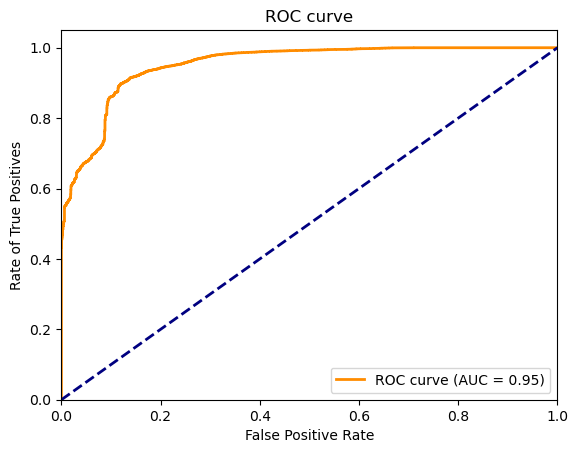

In [270]:
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('Rate of True Positives')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()


# Comparative Graphs

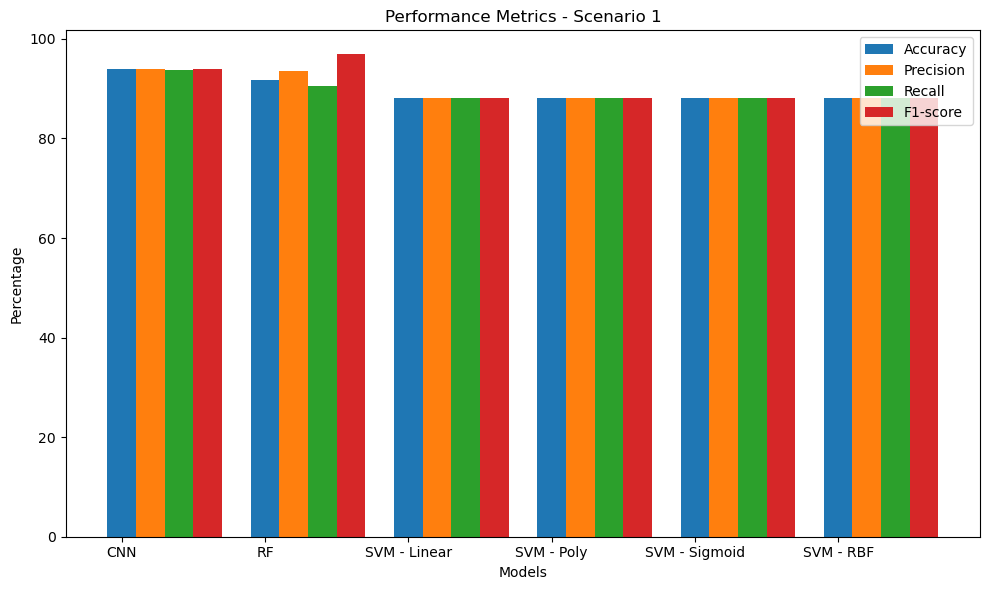

In [271]:
import matplotlib.pyplot as plt

models = ['CNN', 'RF', 'SVM - Linear', 'SVM - Poly', 'SVM - Sigmoid', 'SVM - RBF']
accuracy = [93.91, 91.81, 88.18, 88.18, 88.18, 88.18]
precision = [93.86, 93.6373, 88.18, 88.18, 88.18, 88.18]
recall = [93.82, 90.61, 88.18, 88.18, 88.18, 88.18]
f1score = [93.91, 96.87, 88.18, 88.18, 88.18, 88.18]

x = range(len(models))

plt.figure(figsize=(10, 6))
plt.bar(x, accuracy, width=0.2, align='center', label='Accuracy')
plt.bar([i + 0.2 for i in x], precision, width=0.2, align='center', label='Precision')
plt.bar([i + 0.4 for i in x], recall, width=0.2, align='center', label='Recall')
plt.bar([i + 0.6 for i in x], f1score, width=0.2, align='center', label='F1-score')

plt.xlabel('Models')
plt.ylabel('Percentage')
plt.title('Performance Metrics - Scenario 1')
plt.xticks(x, models)
plt.legend()
plt.tight_layout()

plt.show()